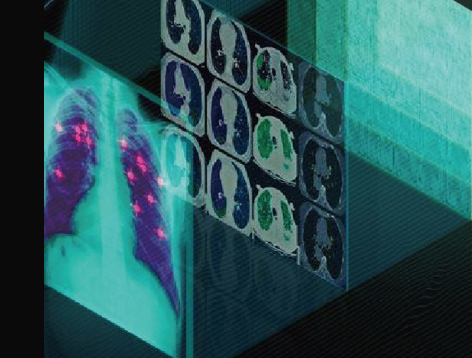

딥러닝 기술이 산업적으로 명확한 용도를 입증한 도메인 중 하나로 의료 분야를 들 수 있다. 의료 영상을 분석하는 일은 전문적인 훈련을 받은 숙련된 의료 인력만 가능한 일이지만, 최근의 발달된 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 영상분석 인력의 개인적 편차, 주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정받고 있다.

하지만, 의료 영상을 분석하는 것은 일반적인 이미지 처리와는 다소 다른 독특한 특징이 있다. 그 특징은 아래와 같다.

1) 의료 영상 이미지는 개인 정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않다.

2) 라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비싸다.

3) 희귀질병을 다루는 경우 데이터를 입수하는 것 자체가 드문 일이다.

4) 음성/양성 데이터 간 imbalance가 심하다. 학습에 주의가 필요하다.

5) 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있다.

따라서 의료 영상 처리를 위해서는 딥러닝 영상처리 기술뿐 아니라, 의료 도메인 지식 및 의료 영상에 대한 명확한 이해가 아울러 필요하다.

오늘은 의료 영상의 기초 상식에 대해 간단히 알아보고, 실제로 의료 영상 데이터를 처리하는 실습을 해보려고 한다.

오늘 사용할 데이터는 Chest X-Ray Images (Pneumonia)이다.

클라우드에는 이미 데이터셋이 업로드 되어있다. 'Cloud shell'을 통해 프로젝트 디렉토리를 생성한 후 데이터셋을 불러온다.

In [30]:
# mkdir -p ~/aiffel/chest_xray
# ln -s ~/data/ ~/aiffel/chest_xray

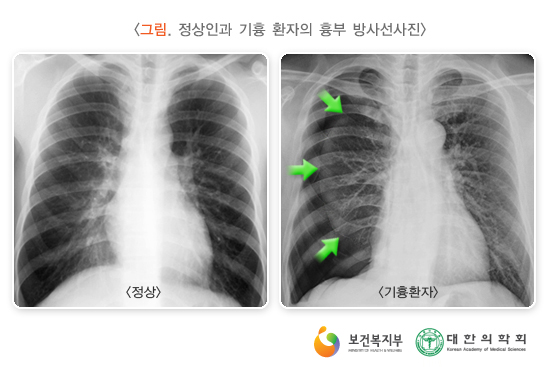

위의 사진과 같이 폐의 정상 여부 혹은 모양을 보려고 X-RAY, CT를 찍는다. 우리는 이제 피부에 칼을 대지 않아도 우리의 몸속을 볼 수 있게 되었다. 이런 기술은 우리의 평균수명을 향상시키는 데 크게 이바지하고 있다.

의료 영상 종류

X-RAY: X-RAY는 전자를 물체에 충돌시킬 때 발생하는 투과력이 강한 복사선(전자기파)을 말한다. X-RAY는 방사선의 일종으로 지방, 근육, 천, 종이같이 밀도가 낮은 것은 수월하게 통과하지만, 밀도가 높은 뼈, 금속 같은 물질은 잘 통과하지 못한다.

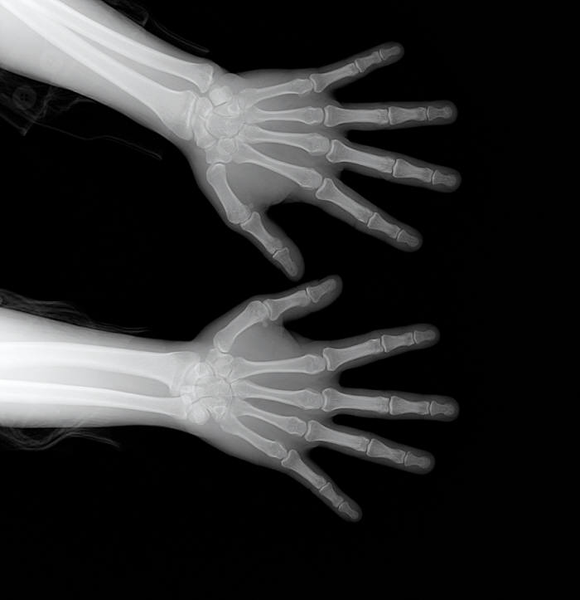

CT: CT는 Computed Tomography의 줄임말로, 환자를 중심으로 X-RAY를 빠르게 회전하여 3D 이미지를 만들어내는 영상이다. 환자의 3차원 이미지를 형성하여 기본 구조는 물론 가능한 종양 또는 이상을 쉽게 식별하고 위치를 파악할 수 있다.

신체의 단면 이미지를 "Slice"라고 한다. 이러한 Slice는 단층 촬영 이미지라고도 하며 기존의 X-RAY보다 더 자세한 정보를 포함한다.

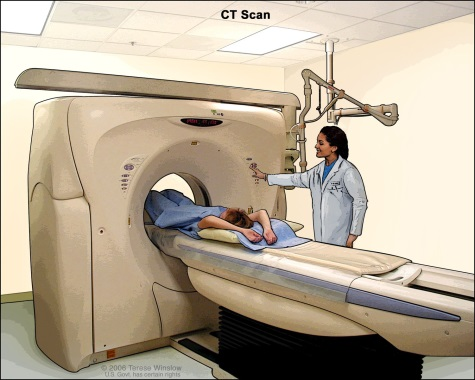

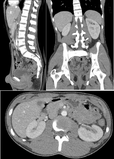

MRI: MRI는 Magnetic Resonance Imaging(자기 공명 영상)의 줄임말로 신체의 해부학적 과정과 생리적 과정을 보기 위해 사용하는 의료 영상 기술이다. MRI 스캐너는 강한 자기장를 사용하여 신체 기관의 이미지를 생성한다. MRI는 CT, X-RAY와 다르게 방사선을 사용하지 않아서 방사선의 위험성에서는 보다 안전하다.

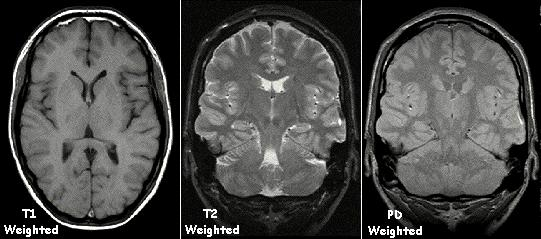

의료 영상 종류 중  X-RAY에 대해 더 알아보겠다. X-RAY 이미지를 기반으로 하는 폐렴 진단 딥러닝 모델을 제작할 것이기 때문이다.

X-RAY 이미지를 이해하려면, X-RAY 영상을 촬영하기 위해 사용되는 자세 분류 체계를 이해하는 것이 중요하다.

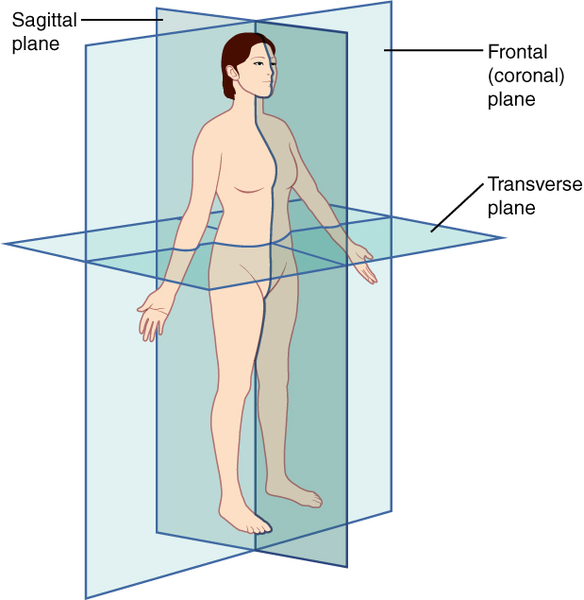

1) Sagittal plane : 시상면. 사람을 왼쪽과 오른쪽을 나누는 면.

2) Coronal plane : 관상면. 인체를 앞뒤로 나누는 면.

3) Transverse plane : 횡단면(수평면). 인체를 상하로 나누는 면.

예시 사진을 보면 현재 보고 있는 부분은 흉부 부분이며 폐와 갈비뼈가 보이는 것을 육안으로 확인 가능하다. 이 이미지는 3가지 단면 중 관상면(Coronal plane)이다.

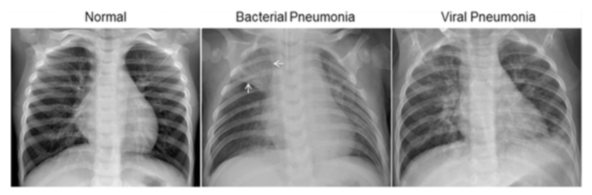

X-RAY는 전자기파가 몸을 통과한 결과를 이미지화 시킨 것이다. 즉, 통과하고 남은 전자기파의 결과이기 때문에 색상이 아니라 흑백 명암으로 나오게 된다.

X-RAY는 부위에 따라서 명암이 다르게 나온다.

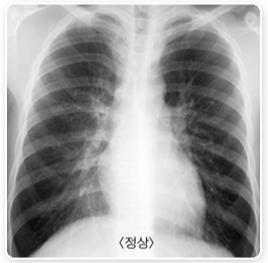

흉부쪽 영상을 보면 갈비뼈는 흰색, 폐는 검은색, 어깨쪽의 지방 및 근육은 연한 회색으로 나오는 것을 확인할 수 있다. 참고로 공기는 검은색이고, 폐는 공기가 많이 차있기 때문에 검은색으로 나온다.

의료 인공지능은 질병의 정확한 분류 또는 환자의 중증도를 확인하는 용도 등 다양한 용도로 사용된다. 이 중 우리는 의사처럼 질병(폐렴)을 찾아내는 딥러닝 모델을 만들 것이다. 참고로 폐렴(pneumonia 뉴모니아)이란, 폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다.

폐렴구별법은 예상외로 간단한데, X-RAY 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰된다.
구별 방법은 간단하지만 실제로 영상을 보면 희미한 경우가 많이 있어 저게 실제로 폐렴으로 인한 것인지 아니면 다른 이유 때문인지 파악하기 어렵다.

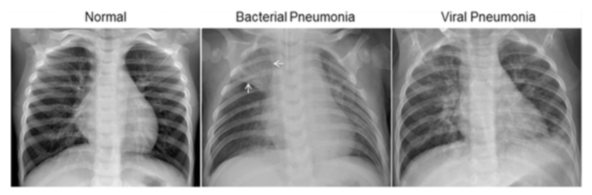

정상적인 흉부 X-RAY(왼쪽)는 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐를 보여준다.

세균성 폐렴 (가운데)은 일반적으로 오른쪽 상부 엽 (흰색 화살표)에 나타나는 반면, 바이러스성 폐렴 (오른쪽)은 양쪽 폐에서보다 확산된 "interstitial(조직 사이에 있는)" 패턴으로 나타난다.

위와 같이 폐렴에 걸린 사진들은 특징이 패턴을 이루고 있는 것을 볼 수 있다. 딥러닝 알고리즘은 이런 패턴을 잘 읽어내기 때문에 잘 학습시키면 잘 찾아낼 것이다.

그럼 이제 폐렴인지 아닌지에 대해 진단을 내릴 수 있는 딥러닝 모델을 만들어 보겠다.

## 순서

Step 1. 실험환경 Set-up

Step 2. 데이터 준비하기

Step 3. 데이터 시각화

Step 4. CNN 모델링

Step 5. 데이터 imbalance 처리

Step 6. 모델 훈련

Step 7. 결과 확인과 시각화

Step 1. 실험환경 Set-up

In [54]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

패키지(라이브러리)들을 import한다.

In [55]:
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)

/aiffel/aiffel


Step 2. 데이터 준비하기

데이터를 열어보면 이미 train, val(validation), test 로 나누어져 있다. 이제 각 데이터들의 개수를 한번 체크해보겠다.

In [56]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


train 안에는 5216개, test 안에는 624개, val 안에는 16개가 있다.

개수 비는 89%, 10.7%, 0.3% 이다. val 개수가 너무 없기 때문에 train에서 val에 쓰일 데이터를 더 가져오겠다.

train과 val에 있는 데이터를 모은 다음에 train : val를 80:20으로 분할한다.

In [57]:
# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


이제 train은 4185개, test는 624개, val은 1047개가 되었다. test_size를 수정하면 개수는 달라질 수 있다.

train 데이터 안에 정상 이미지 수와 폐렴 이미지 수를 한번 보겠다.

정상 이미지와 폐렴 이미지를 구분해야 하는데 다행히도 파일 경로에 힌트가 있다.

In [58]:
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/NORMAL2-IM-1317-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person299_bacteria_1418.jpeg


이제 파일 경로에 NORMAL이 있는지 확인하면 정상 이미지를 셀 수 있다. 또한, 파일 경로에 PNEUMONIA가 있는지 확인하면 폐렴 이미지도 셀 수 있다.

In [59]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1072
Pneumonia images count in training set: 3113


결과를 보면 정상보다 폐렴 이미지 수가 3배 더 많이 있다. 우리가 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을수록 training을 잘한다. 데이터가 클래스 불균형(imbalance)한 것은 차후에 조정할 것이다. test와 val 데이터셋은 평가하기 위해서 사용되기 때문에 학습과 관련이 없으므로 imbalance한 데이터 셋이어도 문제없다.

tf.data 인스턴스를 만들어 보겠다. tf.data는 tensorflow에서 학습시킬 때, mini-batch로 작업할 수 있도록 해준다.

mini-batch를 사용하는 이유는 [여기][1]에서 알 수 있다.

[1]:https://acdongpgm.tistory.com/202

In [60]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

Train 데이터셋, validation 데이터셋 개수 확인을 해보겠다.

In [61]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


각각 4185개, 1047개이다.

현재 이미지에는 라벨 데이터가 따로 없다.
파일 경로에 'NORMAL'이나 'PNEUMONIA'가 포함되어 있기 때문에 이를 이용해서 라벨 데이터를 만들어 주는 함수를 만들어 보겠다.

In [62]:
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

이미지 데이터는 현실적으로 사이즈가 제각각일 가능성이 높다. 이미지의 사이즈를 통일 시키고 GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지 사이즈를 줄여본다.

decode_img 함수와 process_path 함수를 만들겠다. process_path 함수에서 decode_img 함수를 이용해서 이미지의 데이터 타입을 float으로 바꾸고 사이즈를 변경한다. get_label을 이용해서 라벨 값을 가져온다.

In [63]:
# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

train 데이터 셋과 validation 데이터 셋을 만든다. num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE변수를 이용하면 더욱 빠르게 데이터를 처리해 줄 수 있다.

In [64]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

이미지가 잘 리사이즈 되었는지, 그리고 라벨이 잘 들어가 있는지 확인해 본다.

In [65]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


사이즈가 잘 변환되어 있고 라벨도 잘 들어가 있다. 참고로, 코드에서 train_ds.take(1)은 하나의 데이터만 가져온다는 의미이다.

위에서 train과 validation 데이터셋을 만든 것처럼 test 데이터셋도 만들어 보겠다. 그리고 데이터 개수도 확인해보겠다.

In [66]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


Tensorflow에서는 tf.data 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 해준다. tf.data 파이프라인을 이용하여 prepare_for_training() 함수를 정의해서 데이터를 변환시켜주겠다.

shuffle()을 사용하며 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택한다.

repeat()를 사용하면 epoch를 진행하면서 여러 번 데이터셋을 불러오게 되는데, 이때 repeat()를 사용한 데이터셋의 경우 여러 번 데이터셋을 사용할 수 있게 해준다. 예를 들어, 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요하게 된다. repeat()를 사용하면 자동으로 데이터를 맞춰준다.

batch()를 사용하면 BATCH_SIZE에서 정한 만큼의 배치로 주어진다.
예를 들어, 100개의 데이터를 10개의 배치로 나누게 되면 각 배치에는 10개의 데이터로 나뉘게 된다.

prefetch()를 사용하면 학습 데이터를 나눠서 읽어오기 때문에, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄일 수 있다.

In [67]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

Step 3. 데이터 시각화

데이터를 보기 위해 먼저, train에 있는 batch 중 첫 번째 배치를 추출한다. 그리고 추출된 배치를 image와 label 데이터 셋으로 나눈다. 이제 show_batch() 함수를 이용해서 결과 사진을 보겠다.

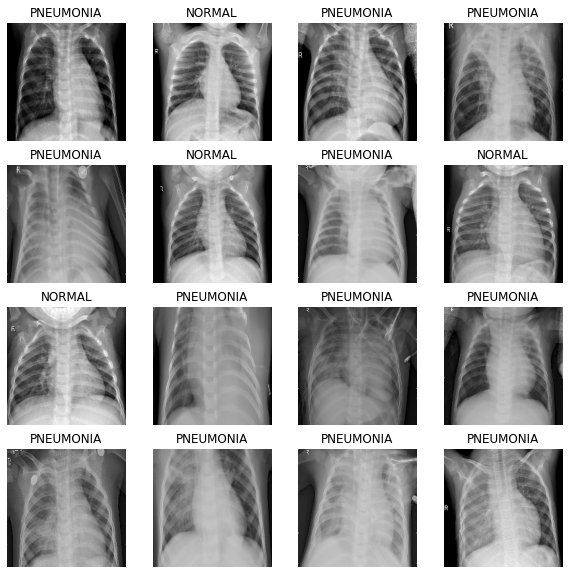

In [68]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

Step 4. CNN 모델링

이미지 처리에 특화된 딥러닝 모델인 CNN을 통해 모델링을 하고 결과를 만들어 보겠다.

In [69]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

먼저, Convolution block을 만든다. conv_block()의 구성은 Convolution을 두 번 진행하고 Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결한다. 그리고 Max Pooling을 한다.

In [70]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

Dense Block은 위와 같이 만든다.

우리가 만들 CNN 모델은 약간의 수정을 거쳐 만들어진 모델이다. 전형적인 CNN 모델과는 약간 다른 모델이다.

방금 만들어진 모델에는 Batch Normalization과 Dropout이라는 두 가지 regularization 기법이 동시에 사용되고 있다. 일반적으로 이런 방법은 잘 사용되지 않거나, 금기시되기도 한다. 그러나, 실용적으로는 두 방법을 같이 쓰는 것이 낫다고 보는 견해도 없는 것은 아니다. 예외적으로 동시에 사용하는 것이 성능 향상에 도움을 주는 경우가 실제로 있다.

In [71]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

Step 5. 데이터 imbalance 처리

'Normal'과 폐렴에서 'Pneumonia' 중에 'Pneumonia' 데이터가 많이 있었다. 한 라벨이 너무 많은 경우를 imbalance 하다고 하는데, 데이터를 학습할 때 imbalance한 데이터의 경우 학습 효과가 좋지 않을 수 있다.

이런 문제들을 해결하는 방법으로 Weight balancing이라는 테크닉이 사용된다. Weight balancing 은 training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법이다. Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight 에 이러한 클래스별 가중치를 세팅할 수 있도록 지원하고 있다. 상세한 내용은 [여기][1]를 참고한다.

[1]:https://3months.tistory.com/414

In [72]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.95
Weight for PNEUMONIA: 0.67


위 코드에서 weight_for_0은 'Normal' 이미지에 사용할 weight를, weight_for_1은 'Pneumonia' 이미지에 사용할 weight를 세팅한다. 이 weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정된다.

Step 6. 모델 훈련

In [73]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

이미지 훈련은 GPU를 사용할 것이기 때문에 먼저 GPU를 선택한다. 모델은 위에서 만들었던 모델 함수인 build_model()을 model에 선언한다.

이미지의 라벨이 두 개밖에 없기 때문에 "binary_cross entropy" loss를 사용한다. optimizer로 'adam'을 사용한다. 성과에 대해서 측정하기 위한 metrics으로 'accuracy', 'precision', 'recall'을 사용한다.

모델을 fit 해보겠다. 각 파라미터에 위에서 선언했었던 변수, 데이터 셋을 가져와서 각각에 맞게 넣어준다. (모델 학습시 약 20분 이상 소요됨)

In [22]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/25
261/261 [==============================] - 61s 187ms/step - loss: 0.3959 - accuracy: 0.7926 - precision: 0.9487 - recall: 0.7624 - val_loss: 0.6500 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 48s 185ms/step - loss: 0.2282 - accuracy: 0.9148 - precision: 0.9735 - recall: 0.9102 - val_loss: 1.2356 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 48s 186ms/step - loss: 0.1910 - accuracy: 0.9322 - precision: 0.9796 - recall: 0.9282 - val_loss: 0.3657 - val_accuracy: 0.8192 - val_precision: 0.8027 - val_recall: 1.0000
Epoch 4/25
261/261 [==============================] - 49s 189ms/step - loss: 0.1821 - accuracy: 0.9356 - precision: 0.9794 - recall: 0.9331 - val_loss: 0.1157 - val_accuracy: 0.9625 - val_precision: 0.9945 - val_recall: 0.9541
Epoch 5/25
261/261 [==============================] - 50s 194ms/step - loss: 0.1795 - accura

Step 7. 결과 확인과 시각화

테스트 데이터로 훈련된 모델을 평가해 본다. 우선은 accuracy를 고려해야겠지만 의료 영상 모델의 특성상 recall도 중요하다. 훈련과정의 history 그래프를 시각화해 보고, 학습 진행 양상을 면밀히 분석해 보는 것도 잊지 않도록 하자.

이제 결과를 확인해본다. 그래프로 Epochs 마다 모델의 precision, recall, accuracy, loss가 어떻게 변하는지 보자.

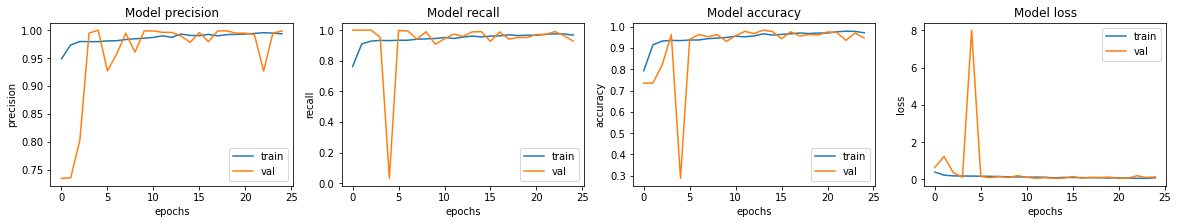

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

테스트 데이터로 모델 평가를 해보겠다.

모델 평가를 위해 loss, accuracy, precision, recall 값을 출력하겠다.

In [24]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 4s 109ms/step - loss: 0.7721 - accuracy: 0.8782 - precision: 0.8552 - recall: 0.9692
Loss: 0.7721127867698669,
Accuracy: 0.8782051205635071,
Precision: 0.8552036285400391,
Recall: 0.9692307710647583


폐렴 진단에 있어서 87%의 정확도가 나왔다. 의사의 진단이 90% 이상이니 의료 보조 용도로는 어느 정도 쓸만한 모델이라고는 할 수 있겠다. 성능개선을 통해 의사 수준에 가까이 가보자.

의료 데이터의 경우 구하기도 어렵고 구하더라도 데이터가 작은 경우가 많이 있다. 이런 문제를 해결하기 위해 Data augmentation 방법을 많이 시도한다.

Data augmentation은 각 데이터에 최적화된 방법을 찾기가 어렵고 제약사항이 많다. 그래서 의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용한다. 이미지 회전, 가우시안 노이즈 추가 방법 등을 많이 사용한다. 특히 장기의 크기는 사람마다 거의 바뀌지 않는다. 이런 특성을 이용한 방법이 노이즈 추가 방법이다.

전통적인 Data augmentation 방법 이외에도 GAN을 이용해서 Data augmentation을 시도하는 연구들도 많이 있다.

## augmentation(좌우 반전)

In [25]:
# train, val data 리셋
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [26]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전합니다.
    return image,label

def prepare_for_training(ds, shuffle_buffer_size=1000):
    # augment 적용 부분이 배치처리 함수에 추가되었습니다.
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

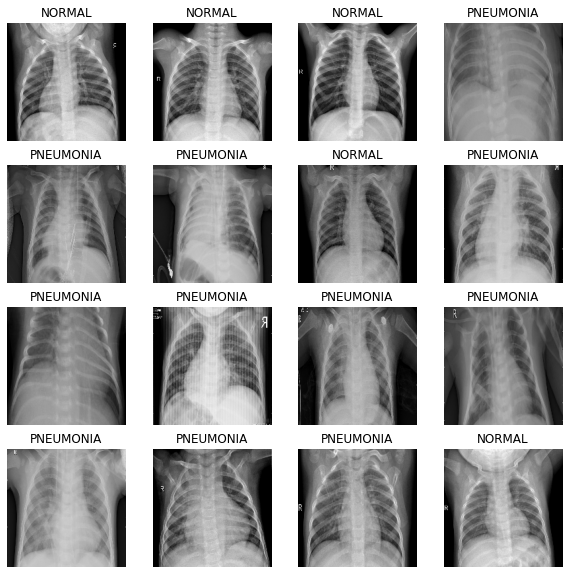

In [27]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

In [28]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [29]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/25
261/261 [==============================] - 58s 188ms/step - loss: 0.4657 - accuracy: 0.7744 - precision: 0.9314 - recall: 0.7520 - val_loss: 0.6799 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 48s 185ms/step - loss: 0.2690 - accuracy: 0.8925 - precision: 0.9657 - recall: 0.8871 - val_loss: 1.3024 - val_accuracy: 0.7365 - val_precision: 0.7365 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 48s 186ms/step - loss: 0.2366 - accuracy: 0.9148 - precision: 0.9712 - recall: 0.9124 - val_loss: 0.1764 - val_accuracy: 0.9212 - val_precision: 0.9081 - val_recall: 0.9935
Epoch 4/25
261/261 [==============================] - 49s 189ms/step - loss: 0.1962 - accuracy: 0.9255 - precision: 0.9758 - recall: 0.9228 - val_loss: 0.0982 - val_accuracy: 0.9683 - val_precision: 0.9828 - val_recall: 0.9739
Epoch 5/25
261/261 [==============================] - 49s 189ms/step - loss: 0.1744 - accura

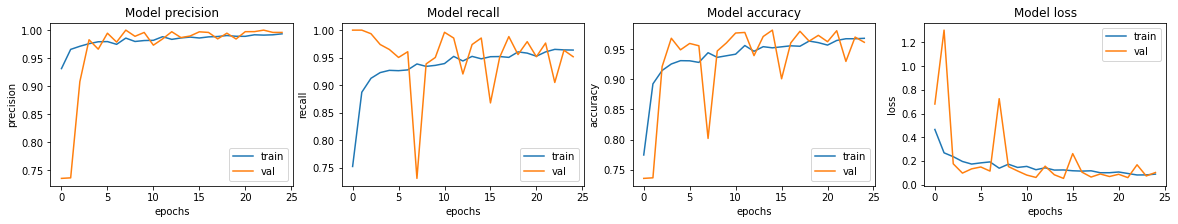

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [31]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 4s 105ms/step - loss: 0.6691 - accuracy: 0.8237 - precision: 0.7979 - recall: 0.9615
Loss: 0.6690645217895508,
Accuracy: 0.8237179517745972,
Precision: 0.7978723645210266,
Recall: 0.9615384340286255


## 기본 모델(Drop out 비율 변경)

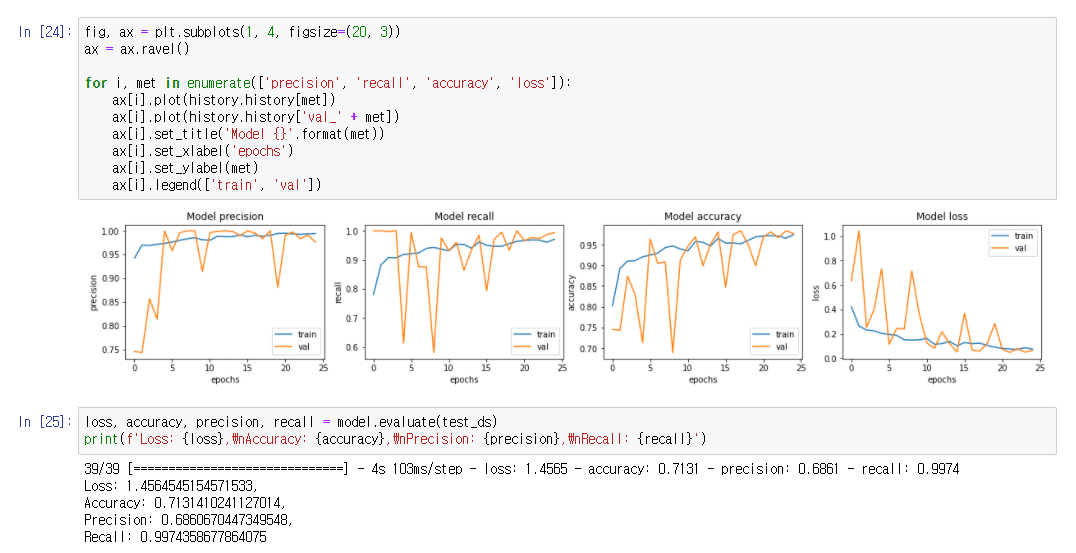

## 기본 모델(BatchNormalization 제외)

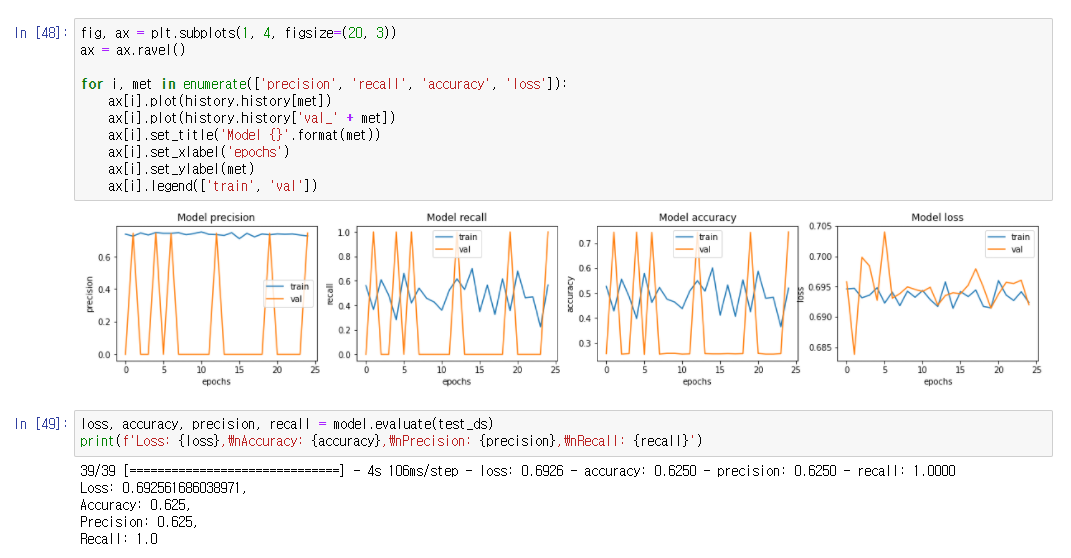

◇ 기본 모델(Drop out 비율 변경)과 기본 모델(BatchNormalization 제외)은 구동 문제로 다른 파일에서 구동하였고, github에 따로 업로드하겠다.

## 모델평가

● 기본 모델 accuracy: 0.8782 recall: 0.9692

기본 모델은 accuracy 87%를 달성하였고, recall 값은 96%를 달성함으로써 4개 모델 중 가장 무난한 결과를 얻었다.

● 기본 모델(augmentation(좌우 반전)) accuracy: 0.8237 recall: 0.9615

기본 모델(augmentation(좌우 반전))은 recall 값은 96%로 높지만, accuracy가 82%로 약간 아쉬운 결과를 얻었다.

● 기본 모델(Drop out 비율 변경) accuracy: 0.7131 recall: 0.9974

기본 모델(Drop out 비율 변경)은 accuracy는 71%로 낮지만, recall 값이 100%에 가까운 값을 얻었다.

● 기본 모델(BatchNormalization 제외) accuracy: 0.6250 recall: 1.0000 

기본 모델(BatchNormalization 제외)은 accuracy는 62%로 매우 낮지만, recall 값이 100%를 얻었다.

# EXPLORATION 9 회고

★이번 프로젝트에서 어려웠던 점

● EXPLORATION을 하는데 있어 예전에 비해 기본적인 어려움은 대부분 사라졌다. 기본적인 어려움을 예를 들면 각 코드별 사용 이유, 에러가 났을 때 대처법같은 것이 있겠다. 문제는 모델별로 성능평가하기 위해 많은 시간을 기다려야 했다. 빠른 시간내 성능이 좋은지 나쁜지 판단할 수 있었다면, 더 많은 모델을 가지고 성능평가를 할 수 있었을 것이다. Dropout을 안써보거나 augmentation(좌우 반전)한 상태에서 Dropout을 안써보는 등 여러가지 모델이 있었을 것이다.

● 구동을 하는데 있어 빈번한 에러가 발생해 다른 파일에서 CNN 모델 2개를 구동하였다. Drop out 비율을 0.2에서 0.4로 증가시킨 모델과 BatchNormalization을 쓰지 않은 모델이다. BatchNormalization을 쓰지 않은 모델을 성능평가하니 val_precision: 0.0000e+00, val_recall: 0.0000e+00라는 결과가 나왔다. 문제점을 찾아보니 데이터 imbalance 처리를 하지 않아 발생한 것으로 보였다. 데이터 imbalance 처리를 하고 나서 해결이 제대로 된 값이 나왔지만, val_precision과  val_recall이 0이 되는 현상은 마지막 EPOCH 25를 제외하고, EPOCH 1부터 24까지 지속적으로 등장하였다. 모델 구조상에 문제가 있는 것으로 예상이 되는데, 아무리 해답을 찾아도 같은 현상이 일어난 다른 사람들과의 코드가 달라 찾지 못했다. 하지만 결과적으로는 이 모델의 성능평가를 어느정도 좋게 낼 수 있겠다. 마지막 EPOCH 25에서 제대로 값이 나왔고, 정확도는 62%로 낮아도 Recall 값 100%를 달성했다. 의료분야에서 질병이 있는데 정상이라고 진단하는 것은 위험하기 때문에 Accuracy를 사용하면 문제가 될 수 있다. 이런 이유로 Recall 값이 100%가 되도록 하는 것이 중요하다. 즉, False Negative 값(질병이 있는데 정상이라고 분류하는 것)이 작아지도록 해야 한다.


★프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

● DeepML에서 Lec.05 Convolutional Neural Networks를 공부하였는데, CNN의 구조를 자세히 알고 나니 EXPLORATION 9에서의 모델설계가 어느정도 이해가 됐다. 

● 같은 모델(기본모델)을 가지고 성능평가를 여러 번 하였다. 첫 번째 평가 때는 정확도 81%, 두 번째 평가 때는 정확도 79%, 세 번째 평가 때는 정확도 87%를 달성했다. 원인은 모델의 학습률이 그때그때마다 달라지기 때문이라고 본다. layer를 쌓는 과정 중에 그리고, 정확도 87%를 달성할 수 있었던 가장 큰 이유로는 애초부터 기본모델 설계가 성능이 잘 나오도록 설계되어 있었다고 생각한다. 활성화 함수인 ReLU와 padding처리가 기본적으로 적용되어 있고, output layer에 sigmoid함수도 적용되어 있어 정확도가 훨씬 올라간다. pooling(MaxPool2D) 역시 오버피팅(과적합)의 위험성을 낮춰주기 위해 적용이 되어 있었다. 하지만 최근에는 정보를 생략하는 pooling을 쓰게 되면 정보 손실이 크다고 생각해 사용하지 않는다고 한다. pooling은 양면의 얼굴을 가지고 있다고 보면 될 것 같다. 성능을 높이는 것과는 관계 없는 이야기지만, 이 모델에 pooling을 적용한 것은 연산 시간을 줄이기 위함인 것 같다. 그리고 Dropout layer의 경우, 모델의 성능을 높여준다는 보장은 없지만, 모델의 오버피팅(과적합)을 막아주는 역할이기 때문에 정확도를 높이는데 한 몫 했을 것이다. 그리고 Dropout은 보통 0.2에서 0.5를 사용하는데 0.2로 맞추어져 있었기 때문에 비율도 잘 맞춰져 있었다고 보면 될 것 같다. 마지막으로  BatchNormalization과 Dropout을 한 모델 안에서 동시에 사용하는 특이한 구성을 가지고 있지만, 이미지 사이즈가 크고 데이터가 부족한 의료 영상에서는 실용적으로 간혹 좋은 성능을 보이기도 한다고 하니 87%의 정확도가 이걸 두고 하는 말일지도 모른다. 아래 이미지를 방금 설명한 내용과 비교해서 보면 이해가 잘 될 것이다.

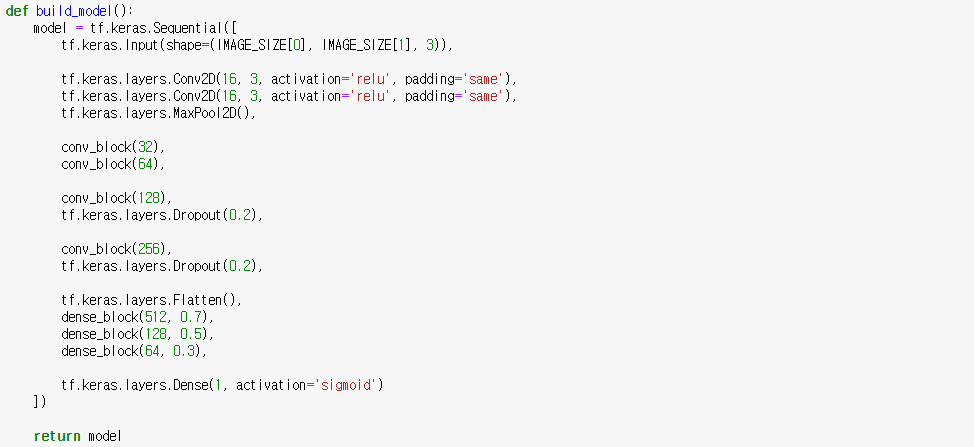

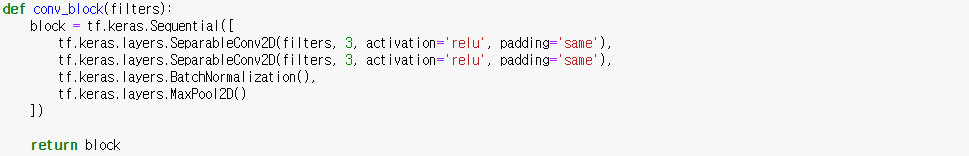

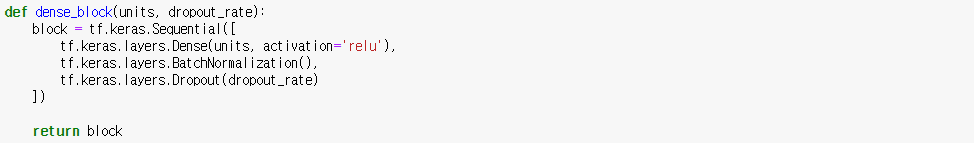


★루브릭 평가 지표를 맞추기 위해 시도한 것들

● Step 1. 실험환경 Set-up

● Step 2. 데이터 준비하기

기본적인 데이터 준비 외 augmentation(좌우 반전) 사용하였음 

● Step 3. 데이터 시각화

학습용 데이터를 시각화해서 확인하였고, augmentation(좌우 반전) 시도 이후 show_batch() 함수를 통해 실제로 좌우 반전 등이 제대로 처리되었는지 확인해 보았음

● Step 4. CNN 모델링

Convolution filter, 채널 개수, activation, 모델 구조 등을 바꾸어 가며 모델링이 가능하지만 구지 바꿀 필요를 느끼지 못해 기본으로 설정되어 있는 모델을 이용함. 또한 BatchNormalization과 Dropout을 한 모델 안에서 동시에 사용하였는데, 이 상태에서 구성을 변경해 어떤 결과가 나오는지 확인해보았음. Dropout 비율을 0.2에서 0.4로 변경해보았고, BatchNormalization을 쓰지 않아 보았음.

● Step 5. 데이터 imbalance 처리

데이터 imbalance 처리를 해보았고, BatchNormalization을 제외한 기본 모델에서 데이터 imbalance 처리를 하지 않았다가 val_precision: 0.0000e+00, val_recall: 0.0000e+00라는 결과를 맞이했다. 물론 imbalance 처리를 하여 해결했다.

● Step 6. 모델 훈련

loss 함수를 변경하기는 어렵겠지만, optimizer나 learning rate 등의 변화를 고려해볼 수 있다고 하였다. 하지만 딱히 변화를 가져갈 필요가 없다고 느껴 실행하지 않았다.

● Step 7. 결과 확인과 시각화

훈련과정의 history 그래프를 시각화해 보고, 학습 진행 양상을 면밀히 분석해 보았다. accuracy가 우선적으로 고려되야 하므로 정확도 85%를 넘기는 것에 성공했다. 또한 의료 영상 모델의 특성상 recall도 중요하기에 recall 값을 100%를 달성하는데 성공했다. 각각 기본 모델과 BatchNormalization을 제외한 기본 모델에서 달성했다.


★자기 다짐

● 모델별로 결과가 나오게 되면, 표를 이용해서 깔끔하게 정리할 필요를 느낀다. 표를 이용하여 정리해 나가는 습관을 들여야겠다.

● CNN이 멀게만 느껴졌는데, 최근 들어 어느 정도 가까워진 느낌을 받았다. 기본적으로 어떤식으로 구성이 되어 있는지 알았기 때문에, 내부를 뜯어보면서 더 자세하게 알아갈 필요가 있다. 앞으로 CNN 모델을 이용하는 EXPLORATION을 하게 되면 지금보다 더 잘하길 바란다.